In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt


import torch
from startorch import example as ex
from startorch import transformer as tr
from startorch import tensor as te
from startorch.utils.seed import get_torch_generator

In [3]:
plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (16, 5)

In [4]:
random_seed = 15803713921897248048

# Table of content

## Exponential
[top](#Table-of-content)

TransformExampleGenerator(
  (generator): TensorExampleGenerator(
      (action): RandIntTensorGenerator(low=0, high=10)
      (size): ()
    )
  (transformer): SequentialTransformer(
      (0): LookupTableTransformer(size=10, index=action, output=rate, exist_ok=False)
      (1): ExponentialTransformer(rate=rate, output=time, exist_ok=False)
    )
)


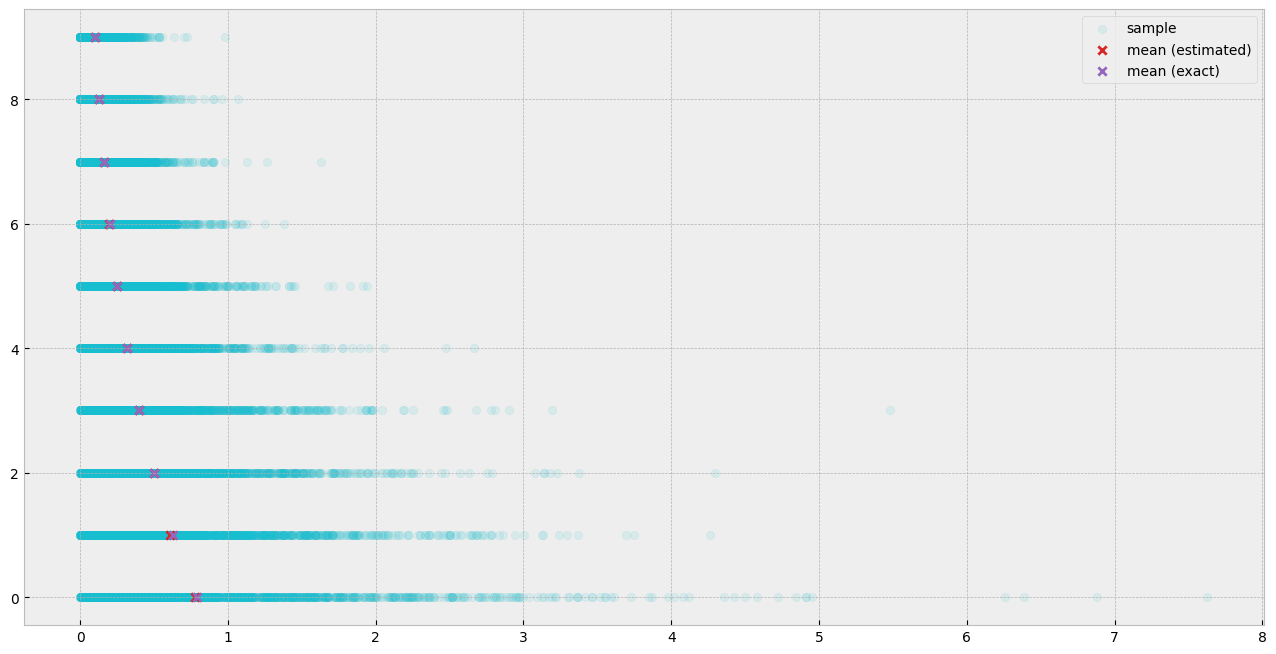

In [5]:
rng = get_torch_generator(random_seed)
num_classes = 10
actions = torch.arange(num_classes)
weights = torch.logspace(start=0.1, end=1.0, steps=num_classes)

generator = ex.Transform(
    generator=ex.TensorExampleGenerator({"action": te.RandInt(0, num_classes)}, size=()),
    transformer=tr.Sequential(
        [
            tr.LookupTable(weights=weights, index="action", output="rate"),
            tr.Exponential(rate="rate", output="time")
        ]
    ),
)
print(generator)
batch = generator.generate(batch_size=20000, rng=rng)

fig, ax = plt.subplots(figsize=(16, 8))
action = batch["action"].numpy().ravel()
time = batch["time"].numpy().ravel()
_ = ax.scatter(time, action, alpha=0.1, color="tab:cyan", label="sample")

_ = ax.scatter([time[action == i].mean().item() for i in range(num_classes)], actions, color="tab:red", label="mean (estimated)", marker="x")
_ = ax.scatter((1 / weights).numpy(), actions.numpy(), color="tab:purple", label="mean (exact)", marker="x")
_ = ax.legend()